In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [ ]:
# from google.colab import files
# uploaded  = files.upload()

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_clean_en.csv') #from 8 topic LDA
df

,Text_en,Text_en_clean,data_words,data_ready,Dominant Topic
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",6
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",1
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",3
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",4
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",1
...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",6
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",0
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",2
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",4


### **i tried with df['Text_en_clean'] as well as df['data_ready'], the results are given below..**

In [20]:
def getSubjectivity(text):
  text = str(text)
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  text = str(text)
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['data_ready'].apply(getSubjectivity)
df['Polarity'] = df['data_ready'].apply(getPolarity)

# df['Subjectivity'] = df['Text_en_clean'].apply(getSubjectivity)
# df['Polarity'] = df['Text_en_clean'].apply(getPolarity)

df

,Text_en,Text_en_clean,data_words,data_ready,Dominant Topic,Subjectivity,Polarity,Analysis
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",6,0.502471,0.062098,Positive
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",1,0.445607,0.010945,Positive
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",3,0.500805,0.113480,Positive
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",4,0.533182,0.060909,Positive
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",1,0.183333,0.050000,Negative
...,...,...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",6,0.050000,-0.075000,Neutral
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",0,0.000000,0.000000,Neutral
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",2,0.414050,-0.016116,Positive
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",4,0.500000,0.000000,Neutral


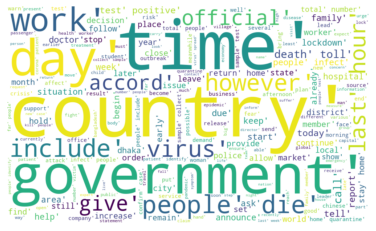

In [21]:
allWords = ' '.join([str(text) for text in df['data_ready']])
wordCloud = WordCloud(width=1000,height=600,background_color='white',random_state=0,).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Text_en,Text_en_clean,data_words,data_ready,Dominant Topic,Subjectivity,Polarity,Analysis
0,Highest number of Covid-19 deaths in a day. Ni...,highest number of covid deaths in a day ninete...,"['highest', 'number', 'covid', 'death', 'day',...","['high', 'number', 'death', 'day', 'people', '...",6,0.502471,0.062098,Positive
1,"Thrown out of job, Tangail’s chamcham makers p...",thrown out of job tangails chamcham makers pas...,"['thrown', 'job', 'tangails', 'chamcham', 'mak...","['throw', 'job', 'tangail', 'maker', 'hard', '...",1,0.445607,0.010945,Positive
2,Coping with Covid-19 Shutdown: 200 families re...,coping with covid shutdown families reaping b...,"['coping', 'covid', 'shutdown', 'family', 'rea...","['cope', 'covid', 'shutdown', 'family', 'reapi...",3,0.500805,0.113480,Positive
3,"7 family members, 4 police personnel test posi...",family members police personnel test positiv...,"['family', 'member', 'police', 'personnel', 't...","['family', 'member', 'test', 'positive', 'bogu...",4,0.533182,0.060909,Positive
4,Coronavirus: Health ministry issues 13 directi...,coronavirus health ministry issues directives...,"['coronavirus', 'health', 'ministry', 'issue',...","['issue', 'official', 'effort', 'contain', 'to...",1,0.183333,0.050000,Positive
...,...,...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,the number of victims and deaths is increasing...,"['number', 'victim', 'death', 'increasing', 'l...","['number', 'victim', 'death']",6,0.050000,-0.075000,Negative
15561,India returns passengers in fear of coronaviru...,india returns passengers in fear of coronaviru...,"['india', 'return', 'passenger', 'fear', 'coro...","['passenger', 'fear']",0,0.000000,0.000000,Neutral
15562,Instructions to bring back the Bangladeshis tr...,instructions to bring back the bangladeshis tr...,"['instruction', 'bring', 'back', 'bangladeshi'...","['instruction', 'trap', 'direct', 'strand', 'r...",2,0.414050,-0.016116,Negative
15563,Coronavirus: Control room opened in the Depart...,coronavirus control room opened in the departm...,"['coronavirus', 'control', 'room', 'opened', '...","['open', 'department', 'health']",4,0.500000,0.000000,Neutral


In [23]:
df['Analysis'].value_counts()

Positive    7161
Neutral     4766
Negative    3638
Name: Analysis, dtype: int64

In [24]:
###Text_en_clean results:

# 56.74% -positve
# 22.92% -neutral
# 20.32% -negative




###data_ready results:

# 46% - positive
# 30% - neutral
# 23% - negative